# Analiza przeżycia na przykładzie zbioru colon z pakietu survival 
### Cel projektu:
Projekt ma na celu zaproponowanie prostego schematu analizy przeżycia, w którym badać będziemy efektywność adiuwantowych chemioterapii w leczeniu raka jelita grubego na podstawie zbioru danych *colon* z pakietu survival dedykowanego dla języka R. 
W ramach projektu zaproponowane zostaną modele:
1. Parametryczny
2. Nieparametryczny
3. Semiparametryczny
<br><br>
### Analiza przeżycia
Analiza przeżycia skupia się na modelowaniu czasu do zaistnienia jakiegoś zdarzenia, przykładowo takim zdarzeniem może być śmierć pacjenta lub nawrot choroby. Najczęsciej dane opierają się na badaniu prowadzonym przez jakiś określony czas na określonej próbie. Obserwację zdarzenia dla jednostki podczas okresu badania określamy jako failure, a brak obserwacji jako censoring. <br>
W analizie przeżycia chcemy określić wpływ zmiennych na prawdopodobieństwo zaistnienia danego zdarzenia. Przykładowo możemy chcieć sprawdzić, czy terapia jest efektywna w leczeniu choroby.
<br><br>
### Opis danych
Jak już zostało wspomniane do projektu użyliśmy zbioru danych *colon* z pakietu survival. Zbiór stworzony został na podstawie jednej z pierwszych udanych prób leczenia raka jelita grubego poprzez adiuwantową chemioterapię. 
 <br>
Cały zbiór składa się z 16 kolumn:
-  id: id
-  study: 1 for all patients
-  rx: Treatment - Obs(ervation), Lev(amisole), Lev(amisole)+5-FU
-  sex: 1=male
-  age: in years
-  obstruct: obstruction of colon by tumour
-  perfor: perforation of colon
-  adhere: adherence to nearby organs
-  nodes: number of lymph nodes with detectable cancer
-  time: days until event or censoring
-  status: censoring status
-  differ: differentiation of tumour (1=well, 2=moderate, 3=poor)
-  extent: Extent of local spread (1=submucosa, 2=muscle, 3=serosa, 4=contiguous structures)
-  surg: time from surgery to registration (0=short, 1=long)
-  node4: more than 4 positive lymph nodes
-  etype: event type: 1=recurrence,2=death


Aby nie komplikować zbytnio analizy, spośród wyżej wymieniobych wybraliśmy 6 zmiennych do naszej analizy, nie wliczając oczywistych zmiennych określających czas i status. Są to:
- rx
- sex
- age
- obstruct
- adhere
- differ
<br> <br> Zmienne te zostały wybrane arbitralnie kierując się naszą niewielką wiedzą na temat raka jelita grubego oraz dokumentacją pakietu survival, która wskazuje na istniejące problemy ze zmienną node4.

Analizę zaczynamy od załadowania potrzebnych bibliotek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lifelines as lfl

### Eksploracja danych

In [16]:
colon_df = pd.read_csv('colon.csv')

In [17]:
colon_df = colon_df[['time', 'status', 'rx', 'sex', 'age', 'obstruct', 'adhere', 'differ']]
colon_df.head()

,time,status,rx,sex,age,obstruct,adhere,differ
0,8,1,3,0,32,0,0,3
1,9,1,3,1,55,1,0,3
2,19,1,1,1,59,1,0,2
3,20,1,2,1,66,1,0,2
4,23,0,3,0,52,0,0,3


Na zbiór danych składa się 888 rekordów

In [20]:
colon_df.dropna(inplace=True)
len(colon_df)

888

### Analiza nieparametryczna
W tej części przedstawimy standardowe krzywe przeżycia dla naszych zmiennych, pokażemy krzywe wyznaczające funkcje ryzyka wyznaczone estymatorem Nelsona-Aalena. Dla wszystkich zmiennych przeprowadzone zostaną również testy log-rank

In [44]:
T = colon_df['time']
E = colon_df['status']

<Axes: xlabel='timeline'>

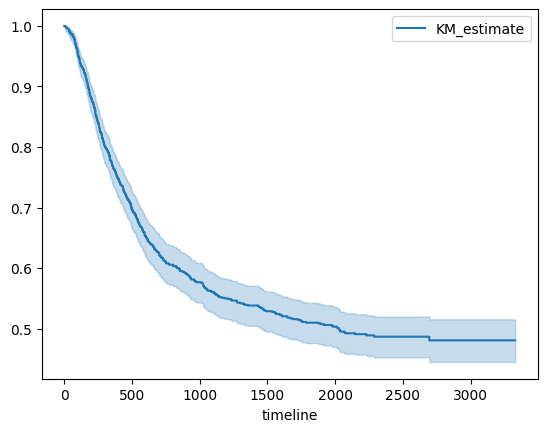

In [46]:
# Overall KM curve
kmf = lfl.KaplanMeierFitter()
kmf.fit(durations=T, event_observed=E)
kmf.plot()

In [54]:
## Hazard function
naf = lfl.NelsonAalenFitter()
naf.fit(T,event_observed=E)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 888 total observations, 442 right-censored observations>

In [55]:
print(naf.cumulative_hazard_.head())

          NA_estimate
timeline             
0.0          0.000000
8.0          0.001126
9.0          0.002254
19.0         0.003382
20.0         0.004512


<Axes: xlabel='timeline'>

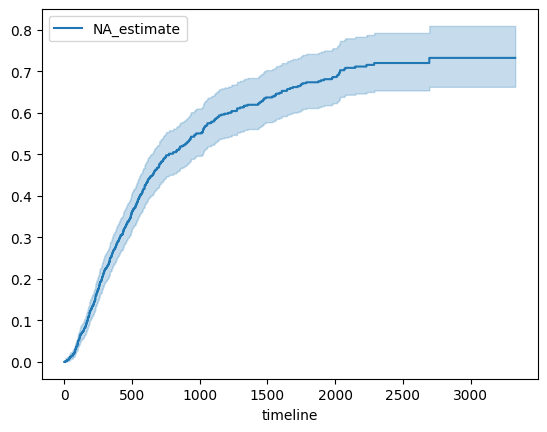

In [56]:
naf.plot_cumulative_hazard()

#### 1. Zmienna określająca sposób leczenia - *rx*

In [36]:
colon_df['rx'].value_counts()

rx
2    305
1    294
3    289
Name: count, dtype: int64

<Axes: xlabel='timeline'>

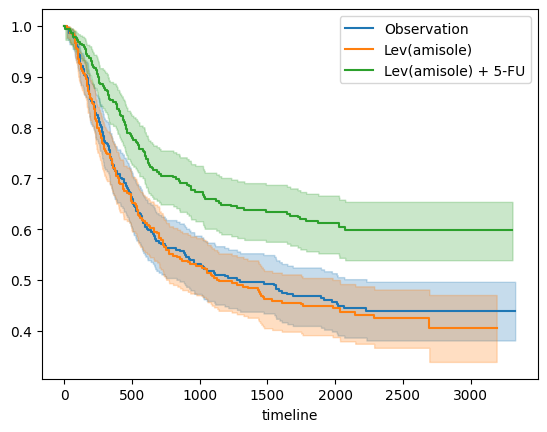

In [ ]:
## K-M curve
rx1 = colon_df['rx'] == 1
rx2 = colon_df['rx'] == 2
rx3 = colon_df['rx'] == 3


ax = plt.subplot(111)

kmf.fit(durations=T[rx1], event_observed=E[rx1], label='Observation')
kmf.plot(ax=ax)

kmf.fit(durations=T[rx2], event_observed=E[rx2], label='Lev(amisole)')
kmf.plot(ax=ax)

kmf.fit(durations=T[rx3], event_observed=E[rx3], label='Lev(amisole) + 5-FU')
kmf.plot(ax=ax)


<Axes: xlabel='timeline'>

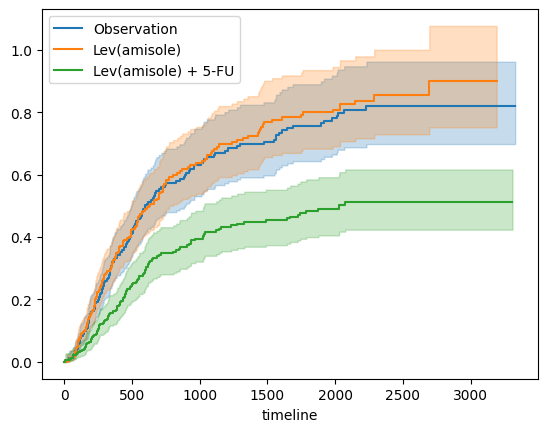

In [57]:
## Hazard function
ax = plt.subplot(111)

naf.fit(durations=T[rx1], event_observed=E[rx1], label='Observation')
naf.plot(ax=ax)

naf.fit(durations=T[rx2], event_observed=E[rx2], label='Lev(amisole)')
naf.plot(ax=ax)

naf.fit(durations=T[rx3], event_observed=E[rx3], label='Lev(amisole) + 5-FU')
naf.plot(ax=ax)

In [52]:
## Log-Rank test

result = lfl.statistics.multivariate_logrank_test(colon_df['time'], colon_df['rx'], colon_df['status'])
result.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          21.95 <0.005     15.83

#### 2. Zmienna określająca płeć - *sex*

In [48]:
colon_df['sex'].value_counts()

sex
1    460
0    428
Name: count, dtype: int64

<Axes: xlabel='timeline'>

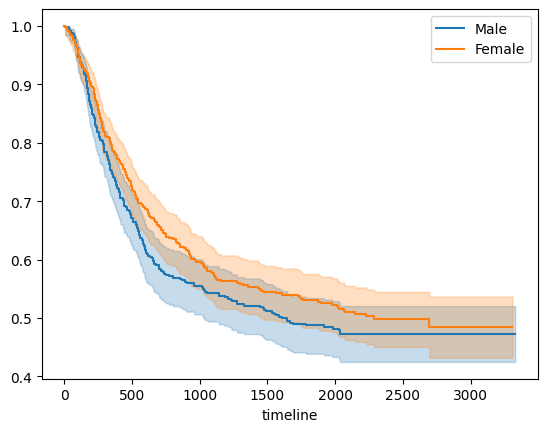

In [49]:
## K-M curve
m = colon_df['sex'] == 0


ax = plt.subplot(111)

kmf.fit(durations=T[m], event_observed=E[m], label='Male')
kmf.plot(ax=ax)

kmf.fit(durations=T[~m], event_observed=E[~m], label='Female')
kmf.plot(ax=ax)

<Axes: xlabel='timeline'>

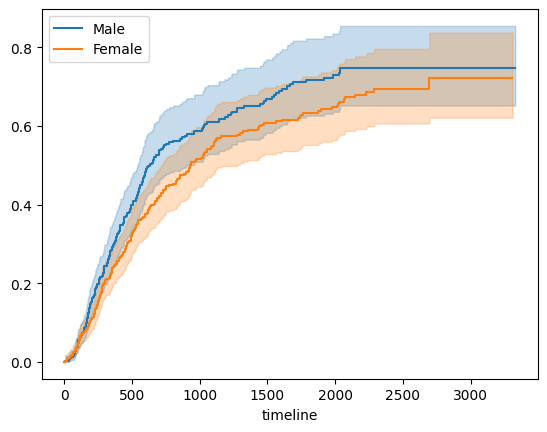

In [58]:
## Hazard function

ax = plt.subplot(111)

naf.fit(durations=T[m], event_observed=E[m], label='Male')
naf.plot(ax=ax)

naf.fit(durations=T[~m], event_observed=E[~m], label='Female')
naf.plot(ax=ax)

In [51]:
## Log-Rank test
result = lfl.statistics.multivariate_logrank_test(colon_df['time'], colon_df['sex'], colon_df['status'])
result.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           1.42 0.23      2.10

#### 3. Zmienna określająca wiek - *age*

In [59]:
colon_df['age'].describe()

count    888.000000
mean      59.810811
std       11.914493
min       18.000000
25%       53.000000
50%       61.000000
75%       69.000000
max       85.000000
Name: age, dtype: float64

(array([  2.,  12.,  37.,  54.,  93., 165., 179., 195., 127.,  24.]),
 array([18. , 24.7, 31.4, 38.1, 44.8, 51.5, 58.2, 64.9, 71.6, 78.3, 85. ]),
 <BarContainer object of 10 artists>)

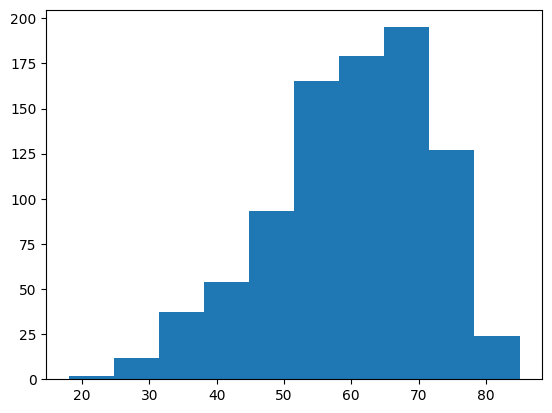

In [60]:
plt.hist(colon_df['age'])

In [61]:
bins = [0, 45, 65, float('inf')]
labels = ['young', 'mid', 'old']

colon_df['age_category'] = pd.cut(colon_df['age'], bins=bins, labels=labels)
colon_df.head()

,time,status,rx,sex,age,obstruct,adhere,differ,age_category
0,8,1,3,0,32,0,0,3,young
1,9,1,3,1,55,1,0,3,mid
2,19,1,1,1,59,1,0,2,mid
3,20,1,2,1,66,1,0,2,old
4,23,0,3,0,52,0,0,3,mid


<Axes: xlabel='timeline'>

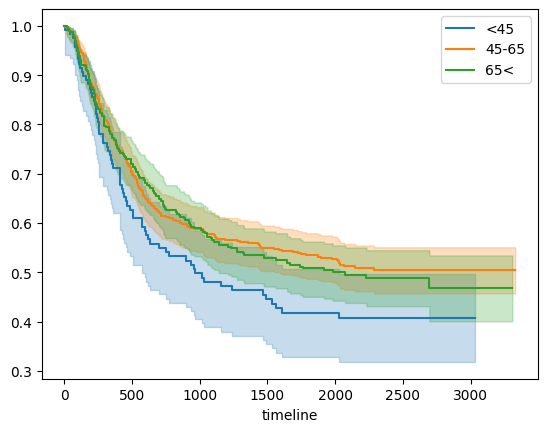

In [63]:
## K-M curve
young = colon_df['age_category'] == 'young'
mid = colon_df['age_category'] == 'mid'
old = colon_df['age_category'] == 'old'


ax = plt.subplot(111)

kmf.fit(durations=T[young], event_observed=E[young], label='<45')
kmf.plot(ax=ax)

kmf.fit(durations=T[mid], event_observed=E[mid], label='45-65')
kmf.plot(ax=ax)

kmf.fit(durations=T[old], event_observed=E[old], label='65<')
kmf.plot(ax=ax)


<Axes: xlabel='timeline'>

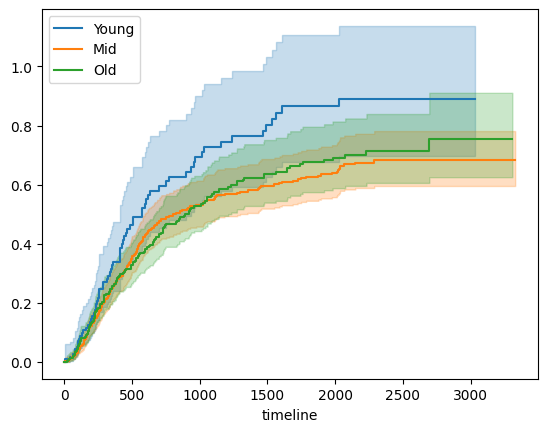

In [65]:
## Hazard function
ax = plt.subplot(111)

naf.fit(durations=T[young], event_observed=E[young], label='Young')
naf.plot(ax=ax)

naf.fit(durations=T[mid], event_observed=E[mid], label='Mid')
naf.plot(ax=ax)

naf.fit(durations=T[old], event_observed=E[old], label='Old')
naf.plot(ax=ax)

In [64]:
## Log-Rank test
result = lfl.statistics.multivariate_logrank_test(colon_df['time'], colon_df['age_category'], colon_df['status'])
result.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           4.15 0.13      2.99

### Model COX PH

In [80]:
# Cox PH model
cph = lfl.CoxPHFitter()
cph.fit(colon_df[['time', 'status', 'rx', 'sex', 'age']], duration_col='time', event_col='status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 888 total observations, 442 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 888
number of events observed = 446
   partial log-likelihood = -2867.61
         time fit was run = 2025-05-10 20:10:18 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
rx        -0.23      0.80      0.06           -0.34           -0.11                0.71                0.89
sex       -0.13      0.88      0.09           -0.32            0.05                0.73                1.05
age       -0.01      0.99      0.00           -0.01            0.00                0.99                1.00

           cmp to     z      p  -log2(p)
covariate                               
rx           0.00 -3.90 <0.005     13.34
sex          0.00 -1.40   0.16      2.63
age          0.00 -1.45   0.15      2.76
---
Concordance = 0.56
Partial AIC = 5741.21
log-likelihood ratio test = 19.05 on 3 df
-log2(p) of ll-ratio test = 11.87

In [81]:
results = lfl.statistics.proportional_hazard_test(cph, colon_df[['time', 'status', 'rx', 'sex', 'age']], time_transform='rank')

In [82]:
results.print_summary()

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 888 total observations, 442 right-censored observations>
         test_name = proportional_hazard_test

---
     test_statistic    p  -log2(p)
age            0.00 0.95      0.08
rx             0.57 0.45      1.16
sex            2.26 0.13      2.91